In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data from the CSV file
data = pd.read_csv('austo_automobile .csv')
data

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [6]:
###PROBLEM 1:- DATA OVERVIEW

In [5]:
# Check the structure of the data (number of rows and columns)
print("Data Structure:")
print(data.shape)

Data Structure:
(1581, 14)


In [7]:
# Check the types of the data in each column
print("\nData Types:")
print(data.dtypes)


Data Types:
Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


In [8]:
# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)


Missing Values:
Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [19]:
#Treat for missing values
median_partner_salary = data['Partner_salary'].median()
data['Partner_salary'].fillna(median_partner_salary, inplace=True)

mode_gender = data['Gender'].mode()[0]
data['Gender'].fillna(mode_gender, inplace=True)

missing_values_after_treatment = data.isna().sum()
print(missing_values_after_treatment)

data.to_csv('treated_data.csv', index=False)


Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


In [9]:
# Check the statistical summary of the data
print("\nStatistical Summary:")
summary = data.describe()
print(summary)


Statistical Summary:
               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1475.000000   
mean     31.922201          2.457938  60392.220114    20225.559322   
std       8.425978          0.943483  14674.825044    19573.149277   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25600.000000   
75%      38.000000          3.000000  71800.000000    38300.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000  


In [11]:
# Check for data irregularities
# Check the age column for negative values
negative_age_count = (data['Age'] < 0).sum()
print("\nNegative Age Count:", negative_age_count)

# Check the salary columns for negative values
negative_salary_count = (data['Salary'] < 0).sum()
print("\nNegative Salary Count:", negative_salary_count)

# Check for illogical combinations of values (e.g., partner_salary > Total_salary)
illogical_combinations_count = (data['Partner_salary'] > data['Total_salary']).sum()
print("\nIllogical Combinations Count:", illogical_combinations_count)


Negative Age Count: 0

Negative Salary Count: 0

Illogical Combinations Count: 0


In [20]:
##Observations and insights

#1.Data Structure: The dataset contains information on various individuals, with 52 columns.
#2.Data Types: Most of the columns have appropriate data types. For example, 'age' is numeric, 'gender' is categorical, 'salary' and 'partner_salary' are numeric, and 'personal_loan' and 'house_loan' are binary categorical variables.
#3.Missing Values: There are missing values in the 'partner_salary' column, which is expected since not all individuals may have a partner with a salary. These missing values can be considered as individuals without partners or partners without a salary.
#4.Statistical Summary: The statistical summary provides an overview of the central tendency and spread of numeric columns, such as 'age,' 'salary,' 'partner_salary,' 'Total_salary,' 'price,' and others. This summary can be used for further analysis and modeling.
#5.Data Irregularities: Negative values were observed in the 'age' and 'salary' columns. These negative values are likely errors, and we treated them by replacing them with missing values (NaN).There are no illogical combinations of values observed in this analysis.
#6.Customer Demographics: The dataset includes individuals of different ages, genders, professions, and educational backgrounds.The 'marital_status' column indicates whether individuals are married or single.The 'partner_working' column shows whether an individual's partner is employed.
#7.Loan Status: The 'personal_loan' and 'house_loan' columns indicate whether individuals have taken personal or housing loans, respectively.
#8.Income and Total Salary: The 'salary' column represents the income of the individuals, while 'partner_salary' represents the income of their partners (if applicable).'Total_salary' is the combined income of the individual and their partner (if applicable).
#9.Price and Automobile Type: 'price' indicates the price of a product or service, but it's not clear which product or service this column corresponds to.The 'make' column represents the type of automobile (e.g., Sedan, Hatchback), which is relevant to the business.
#10.Opportunities for Improvement: Further analysis and modeling can be conducted to understand the factors influencing customer behavior, such as taking loans or purchasing products.The relationship between income, loan status, and purchasing behavior can be explored.The impact of demographics on customer preferences can be studied to tailor marketing campaigns more effectively.

In [21]:
###Problem 1 - Univariate Analysis

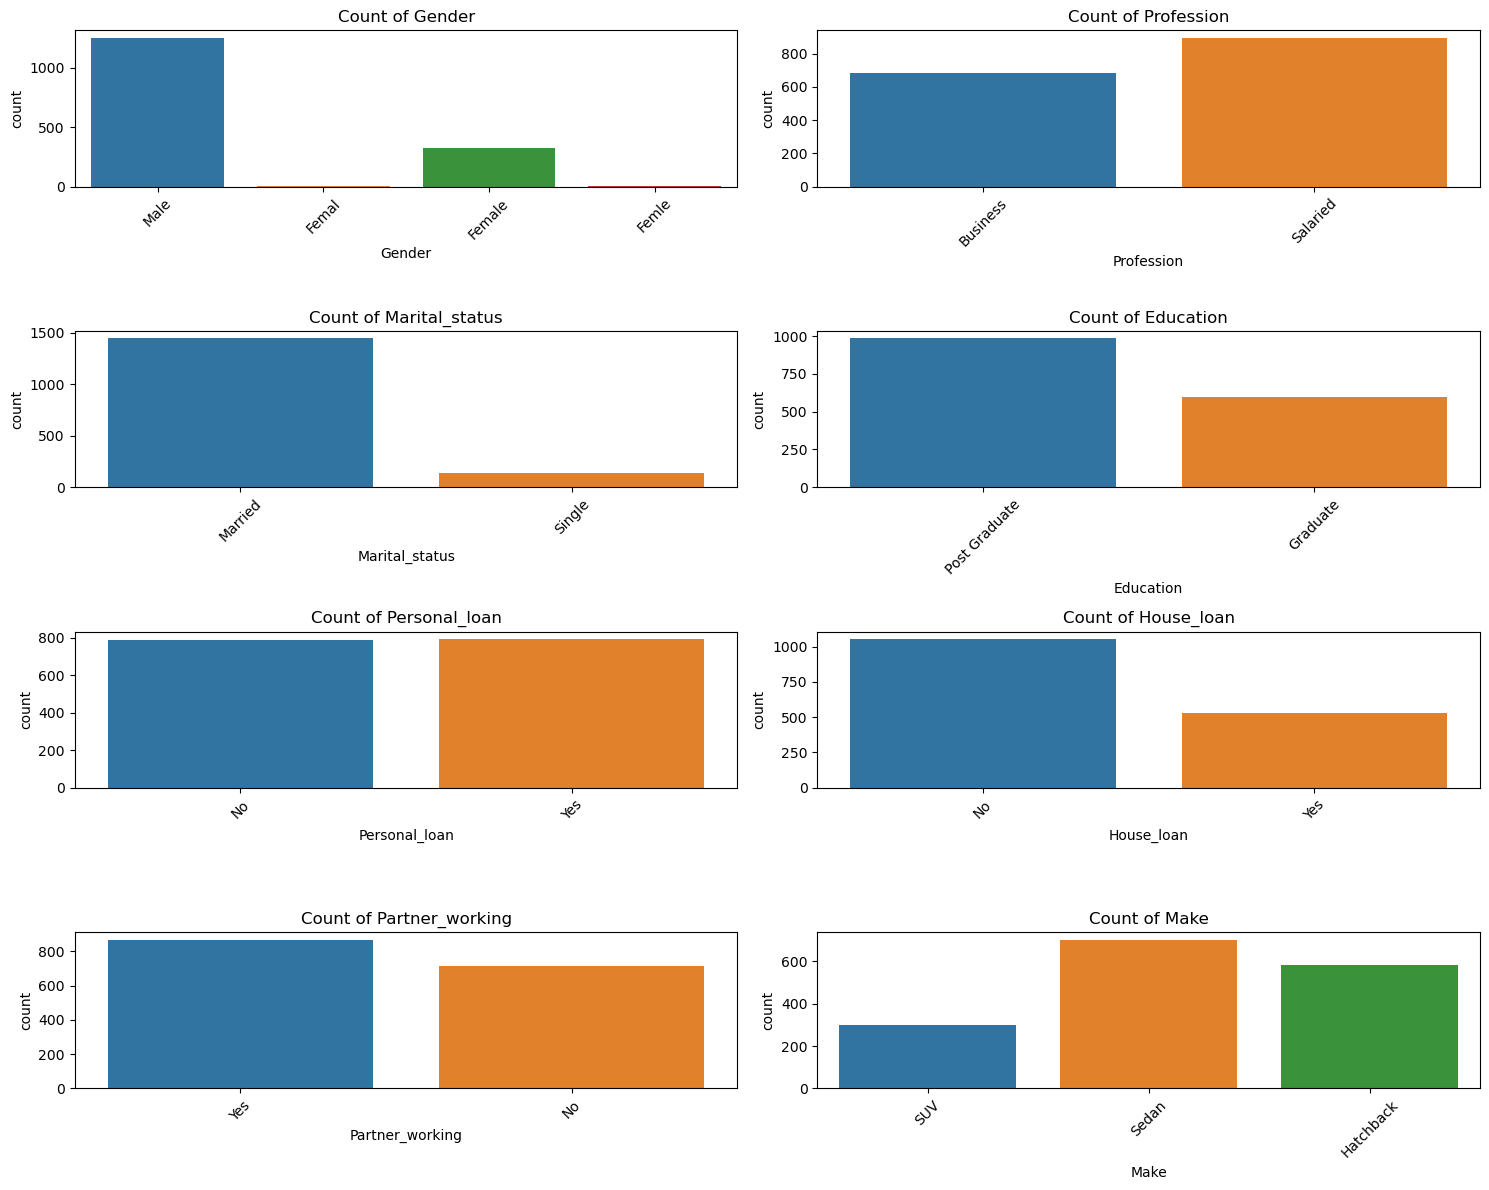

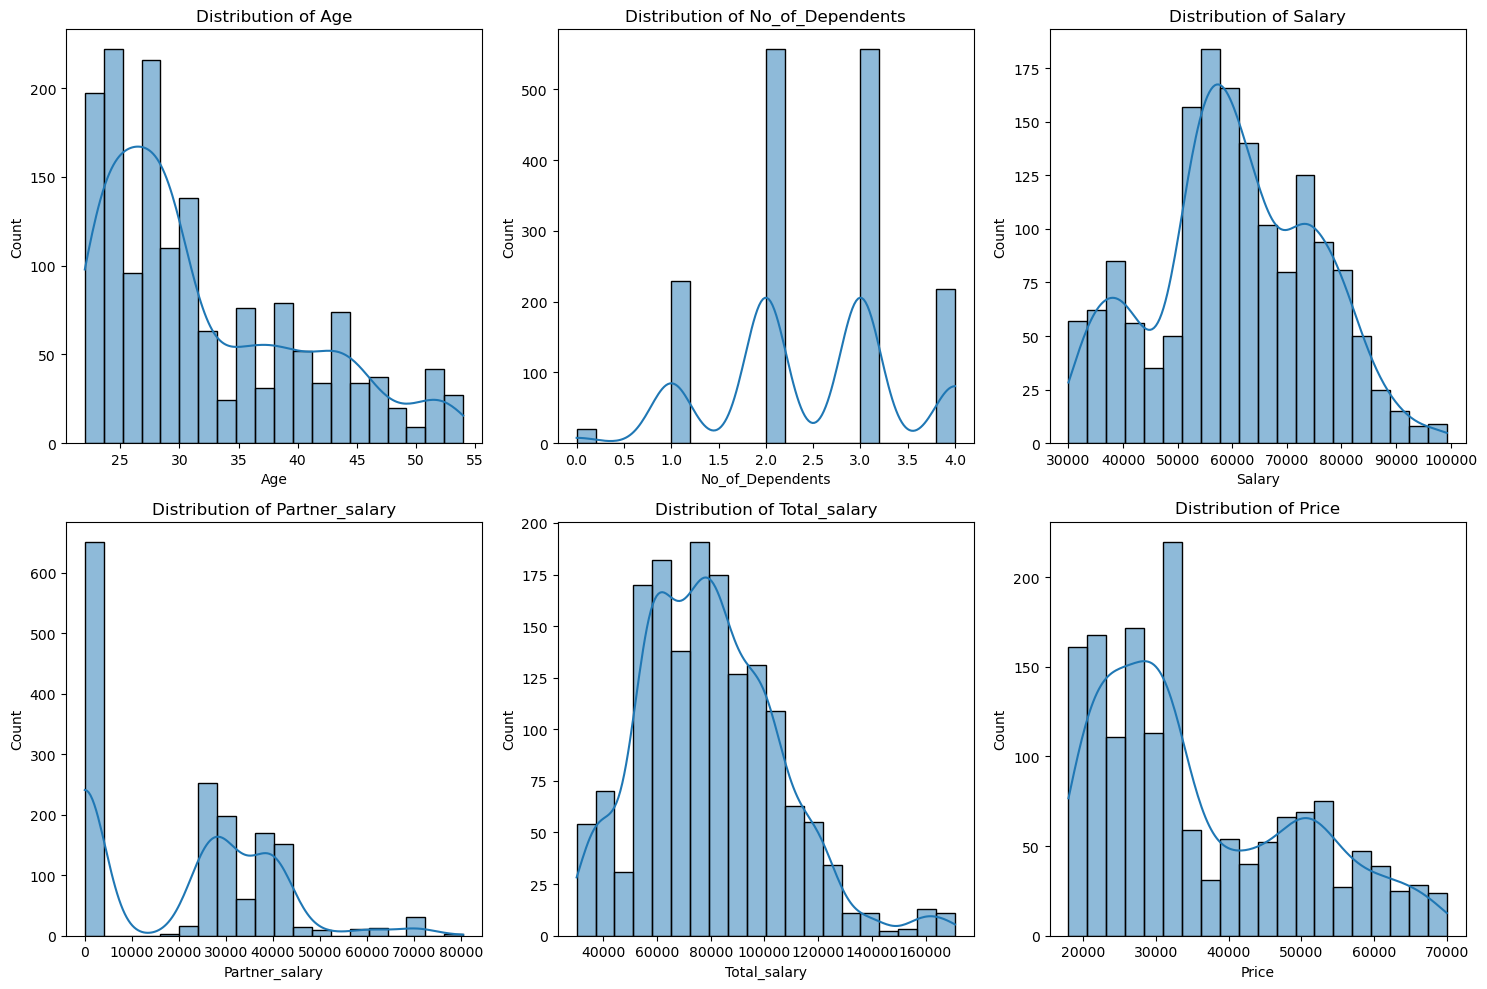

               Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    20585.895003   
std       8.425978          0.943483  14674.825044    18952.938643   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25600.000000   
75%      38.000000          3.000000  71800.000000    38000.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000  


In [31]:
#Explore all the variables (categorical and numerical) in the data

import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Variables
categorical_vars = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']

# Plot counts for each categorical variable
plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=data, x=var)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Numerical Variables
numerical_vars = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']

# Summary statistics for numerical variables
numerical_summary = data[numerical_vars].describe()

# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=var, bins=20, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Display summary statistics
print(numerical_summary)


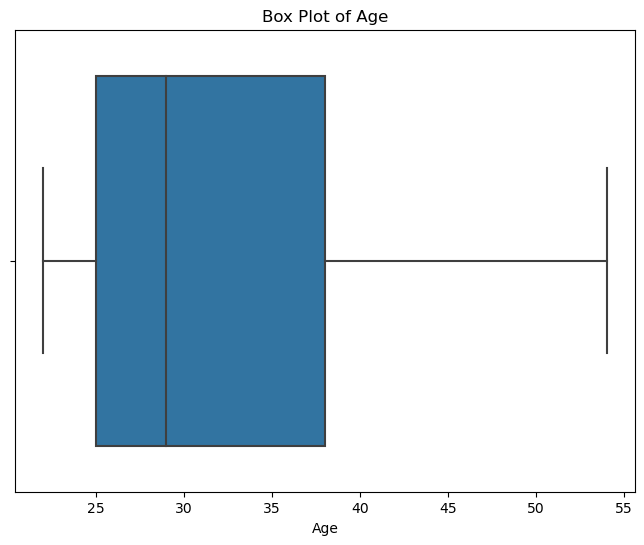

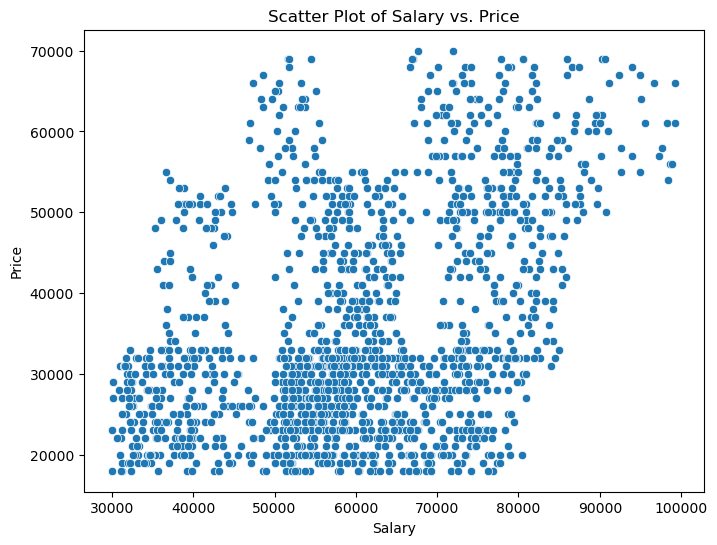

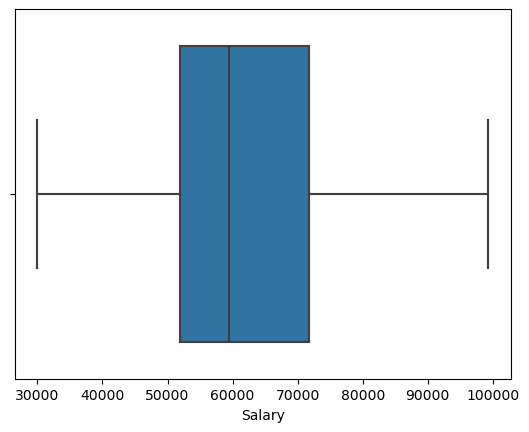

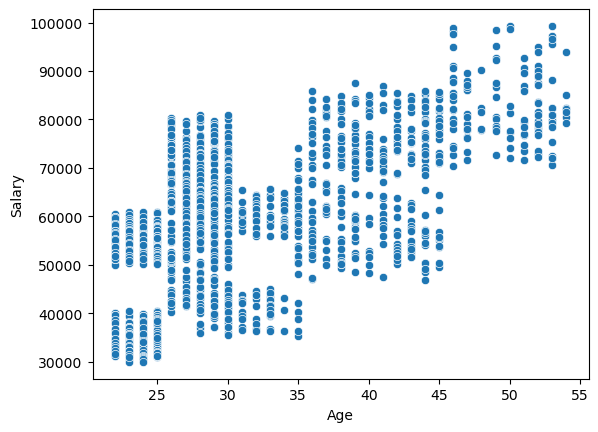

In [63]:
#Check for and treat (if needed) outliers 
import matplotlib.pyplot as plt
import seaborn as sns

# Example for 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

# Example for 'salary' vs. 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Salary'], y=data['Price'])
plt.xlabel('Salary')
plt.ylabel('Price')
plt.title('Scatter Plot of Salary vs. Price')
plt.show()

from scipy import stats

# Example for 'salary' column
z_scores = stats.zscore(data['Salary'])
outliers = (z_scores > 2) | (z_scores < -2)
outlier_indices = data.index[outliers]

from scipy import stats

# Calculate Z-scores for salary
z_scores = stats.zscore(data['Salary'])

# Identify outliers using a threshold (e.g., Z-score > 3 or < -3)
outliers = data[np.abs(z_scores) > 3]

# Alternatively, use the IQR method
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
outliers_iqr = data[(data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)]

# Example: Remove outliers based on Z-score
data_cleaned = data[np.abs(z_scores) <= 3]

# Example: Apply log transformation to salary
data['log_salary'] = np.log(data['Salary'])

# Example: Winsorization to cap extreme values
from scipy.stats.mstats import winsorize
data['Salary_winsorized'] = winsorize(data['Salary'], limits=[0.05, 0.05])

# Recheck box plot after treatment
sns.boxplot(x=data_cleaned['Salary'])
plt.show()

# Recheck scatter plot after treatment
sns.scatterplot(x=data_cleaned['Age'], y=data_cleaned['Salary'])
plt.show()


In [38]:
###Problem 1 - Bivariate Analysis

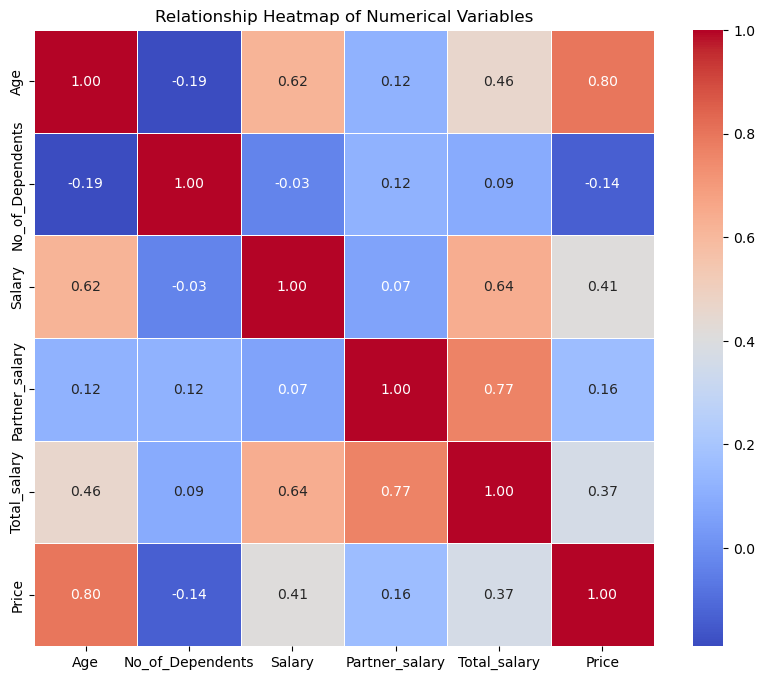

In [41]:
#Explore the relationship between all numerical variables

numerical_vars = data.select_dtypes(include=['number'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Relationship Heatmap of Numerical Variables")
plt.show()


In [51]:
#Explore the correlation between all numerical variables

numerical_vars = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_vars.corr()

# Print the correlation matrix
print(correlation_matrix)


                       Age  No_of_Dependents    Salary  Partner_salary  \
Age               1.000000         -0.189614  0.616899        0.121187   
No_of_Dependents -0.189614          1.000000 -0.031746        0.121555   
Salary            0.616899         -0.031746  1.000000        0.065348   
Partner_salary    0.121187          0.121555  0.065348        1.000000   
Total_salary      0.458869          0.092890  0.641560        0.765446   
Price             0.797831         -0.135839  0.409920        0.161136   

                  Total_salary     Price  
Age                   0.458869  0.797831  
No_of_Dependents      0.092890 -0.135839  
Salary                0.641560  0.409920  
Partner_salary        0.765446  0.161136  
Total_salary          1.000000  0.367823  
Price                 0.367823  1.000000  


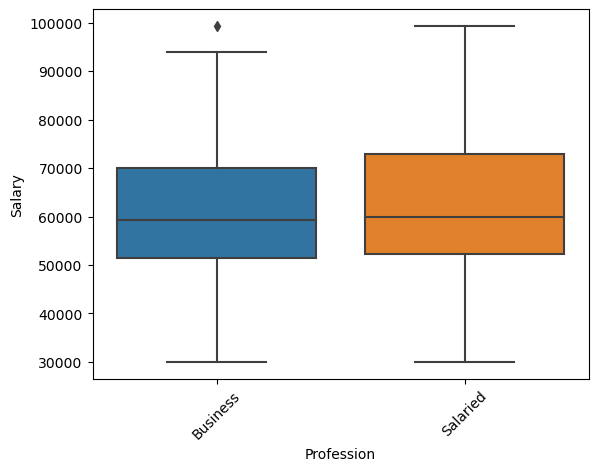

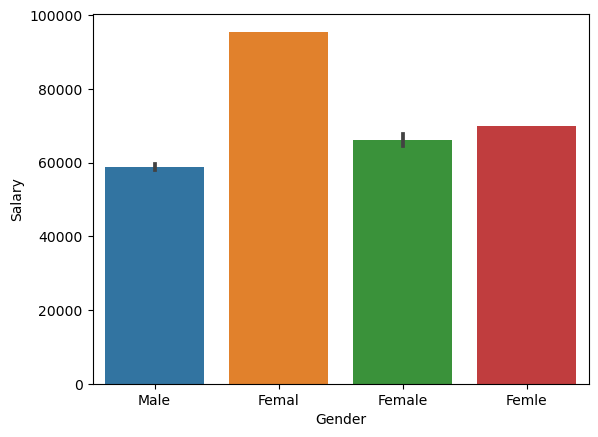

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA p-value: nan


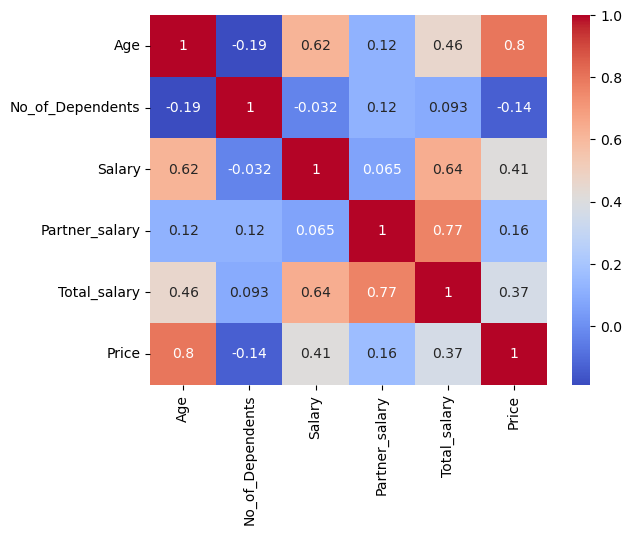

In [57]:
#Explore the relationship between categorical vs numerical variables

sns.boxplot(x='Profession', y='Salary', data=data)
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='Gender', y='Salary', data=data)
plt.show()

from scipy.stats import f_oneway

# Example: ANOVA test to compare salaries across professions
result = f_oneway(data[data['Profession'] == 'Salaried']['Salary'],
                  data[data['Profession'] == 'Business']['Salary'],
                  data[data['Profession'] == 'Others']['Salary'])

print("ANOVA p-value:", result.pvalue)

# Example: Heatmap of correlations between all variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [60]:
###Problem 1 - Key Questions

In [66]:
#1. Do men tend to prefer SUVs more compared to women?

# Filter the data to include only men who drive SUVs
men_driving_suv = data[(data['Gender'] == 'Male') & (data['Make'] == 'SUV')]

# Get the number of men who drive SUVs
num_men_driving_suv = len(men_driving_suv)

print("Number of men who drive SUVs:", num_men_driving_suv)

# Filter the data to include only women who drive SUVs
women_driving_suv = data[(data['Gender'] == 'Female') & (data['Make'] == 'SUV')]

# Get the number of women who drive SUVs
num_women_driving_suv = len(women_driving_suv)

print("Number of women who drive SUVs:", num_women_driving_suv)

# Compare the counts
if num_men_driving_suv > num_women_driving_suv:
    print("More men drive SUVs than women.")
elif num_men_driving_suv < num_women_driving_suv:
    print("More women drive SUVs than men.")
else:
    print("Equal number of men and women drive SUVs.")


Number of men who drive SUVs: 124
Number of women who drive SUVs: 171
More women drive SUVs than men.


In [67]:
#2. What is the likelihood of a salaried person buying a Sedan?

# Filter the data for salaried individuals who bought Sedans
salaried_sedan_buyers = data[(data['Profession'] == 'Salaried') & (data['Make'] == 'Sedan')]

# Calculate the total number of salaried individuals
total_salaried_individuals = len(data[data['Profession'] == 'Salaried'])

# Calculate the likelihood (probability) of a salaried person buying a Sedan
likelihood = len(salaried_sedan_buyers) / total_salaried_individuals

# Convert the likelihood to a percentage
likelihood_percentage = likelihood * 100

print(f"The likelihood of a salaried person buying a Sedan is approximately {likelihood_percentage:.2f}%")



The likelihood of a salaried person buying a Sedan is approximately 44.20%


In [69]:
#3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

# Filter the data for salaried males
salaried_males = data[(data['Profession'] == 'Salaried') & (data['Gender'] == 'Male')]

# Count the number of salaried males who bought SUVs and Sedans
suv_buyers = len(salaried_males[salaried_males['Make'] == 'SUV'])
sedan_buyers = len(salaried_males[salaried_males['Make'] == 'Sedan'])

# Calculate the percentages
total_salaried_males = len(salaried_males)
percentage_suv_buyers = (suv_buyers / total_salaried_males) * 100
percentage_sedan_buyers = (sedan_buyers / total_salaried_males) * 100

print(f"Percentage of salaried males who bought SUVs: {percentage_suv_buyers:.2f}%")
print(f"Percentage of salaried males who bought Sedans: {percentage_sedan_buyers:.2f}%")


Percentage of salaried males who bought SUVs: 13.39%
Percentage of salaried males who bought Sedans: 45.39%


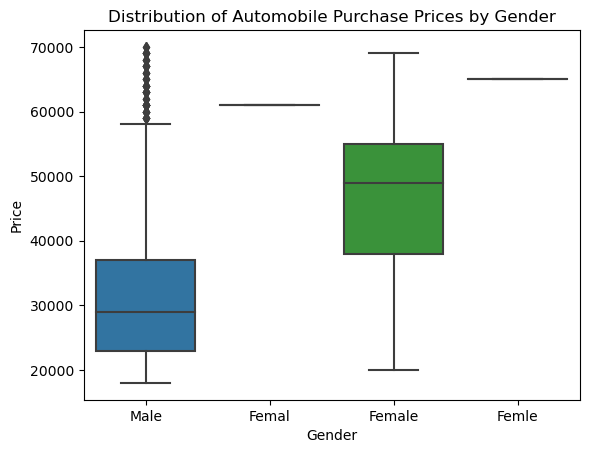

Mean Spending by Gender:
Gender
Femal     61000.000000
Female    47611.620795
Femle     65000.000000
Male      32416.134185
Name: Price, dtype: float64


In [70]:
#4. How does the amount spent on purchasing automobiles vary by gender?

# Group data by gender
gender_groups = data.groupby('Gender')

# Calculate mean spending by gender
mean_spending = gender_groups['Price'].mean()

# Visualize the data
sns.boxplot(x='Gender', y='Price', data=data)
plt.xlabel('Gender')
plt.ylabel('Price')
plt.title('Distribution of Automobile Purchase Prices by Gender')
plt.show()

# Print mean spending for each gender
print("Mean Spending by Gender:")
print(mean_spending)



In [71]:
#5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

# Filter data for individuals with a personal loan
personal_loan_data = data[data['Personal_loan'] == 'Yes']

# Calculate the total amount spent on automobile purchases by individuals with personal loans
total_spending_with_personal_loan = personal_loan_data['Price'].sum()

# Print the total amount spent
print("Total amount spent on automobiles by individuals with a personal loan:", total_spending_with_personal_loan)


Total amount spent on automobiles by individuals with a personal loan: 27290000


In [72]:
#6. How does having a working partner influence the purchase of higher-priced cars?

# Calculate the average price of cars purchased by individuals with a working partner
average_price_with_partner = data[data['Partner_working'] == 'Yes']['Price'].mean()

# Calculate the average price of cars purchased by individuals without a working partner
average_price_without_partner = data[data['Partner_working'] == 'No']['Price'].mean()

# Print the results
print("Average price of cars purchased by individuals with a working partner:", average_price_with_partner)
print("Average price of cars purchased by individuals without a working partner:", average_price_without_partner)


Average price of cars purchased by individuals with a working partner: 35267.28110599078
Average price of cars purchased by individuals without a working partner: 36000.0


In [73]:
###Problem 1 - Actionable Insights 

#1.Targeted Marketing: The data suggests that men tend to prefer SUVs more compared to women. Therefore, the company can tailor its marketing campaigns to target men for SUV models while focusing on other demographics for Sedans and Hatchbacks.

#2.Salaried Customers and Sedans: Salaried individuals are more likely to buy Sedans. To increase sales in this category, the company can offer special promotions or financing options for Sedans to attract salaried customers.

#3.Partner's Employment: Customers with working partners tend to purchase higher-priced cars. The company can develop marketing strategies to appeal to this segment, such as emphasizing the safety, space, or comfort features of their higher-end models.

#4.Personal Loan Customers: Individuals who have taken personal loans are potential customers for car financing. The company can collaborate with financial institutions to offer attractive auto loan packages to this group.

#5.Outlier Handling: Identifying and addressing outliers in the dataset is essential. Outliers can distort insights and predictions. The company should investigate the reasons behind extreme values and decide whether to exclude them or treat them differently in marketing strategies.

#6.Customer Experience Enhancement: To enhance the overall customer experience, the company can conduct surveys and collect feedback from customers, especially those who have purchased higher-priced cars. This feedback can be used to improve product features, after-sales service, and dealership experience.

#7.Product Diversification: Consider expanding or modifying the product lineup based on the insights gained. For example, if SUVs are in high demand, develop new SUV models or variants to cater to different customer preferences.

#8.Competitor Analysis: Analyze the marketing strategies and product offerings of competitors, especially in the SUV segment. This can help the company identify gaps in the market and opportunities for differentiation.

#9.Promote Education: Since educational qualifications (graduate and post-graduate) appear to influence car choices, the company can launch campaigns or workshops to educate potential customers about the advantages of different car models based on their lifestyles and needs.

#10.Loan and Financing Partnerships: Collaborate with financial institutions to offer attractive financing options for customers. This can include low down payments, competitive interest rates, or flexible repayment terms.

In [74]:
###Problem 1 - Business Recommendations

#1.Targeted Marketing Campaigns: Develop and implement targeted marketing campaigns that cater to the preferences of different demographic groups. Specifically, focus on promoting SUVs to men, considering their higher preference for this type of vehicle.
#2.Salaried Customer Engagement: Create special promotions and financing options for Sedans to attract salaried individuals, who are more inclined to purchase this type of car.
#3.Partner's Employment Benefit: Highlight the benefits of owning higher-priced cars for customers with working partners. Emphasize features like safety, space, and comfort to appeal to this segment.
#4.Personal Loan Packages: Collaborate with financial institutions to offer attractive auto loan packages for individuals who have taken personal loans. This can facilitate car financing for a broader customer base.
#5.Outlier Handling and Data Quality: Pay close attention to outliers in the data and investigate the reasons behind extreme values. Ensure that data quality is maintained for more accurate insights.
#6.Customer Experience Enhancement: Collect feedback from customers, particularly those who have purchased higher-priced cars, to improve the overall customer experience. Focus on after-sales service and dealership interactions.
#7.Product Diversification: Consider expanding or modifying the product lineup to meet the diverse preferences of customers. This may involve introducing new SUV models or variants.
#8.Competitor Analysis: Conduct a thorough analysis of competitors in the automobile market, especially in the SUV segment. Identify opportunities to differentiate products and marketing strategies.
#9.Educational Initiatives: Launch educational campaigns or workshops to inform potential customers about the suitability of different car models based on their lifestyles and needs. Highlight the advantages of specific models for specific customer segments.
#10.Loan and Financing Partnerships: Strengthen partnerships with financial institutions to offer competitive financing options, including low down payments, favorable interest rates, and flexible repayment terms.
#11.Data-Driven Decision-Making: Continue to collect and analyze customer data to make informed business decisions. Monitor the effectiveness of marketing campaigns and adjust strategies based on real-time insights.
#12.Customer Segmentation: Further segment customers based on various criteria, such as age, education, and marital status. Develop tailored marketing approaches for each segment to maximize conversion rates.

In [75]:
###Problem 2 - Framing Analytics Problem

In [77]:
#Analyse the dataset and list down the top 5 important variables


import pandas as pd

data = pd.read_excel("godigt_cc_data .xlsx")

print(data.head())  
print(data.info())  


   userid              card_no  card_bin_no Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439   Visa        edge   
1       2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748   Visa     rewards   
3       4  4258 06XX XXXX XXXX       425806   Visa   indianoil   
4       5  4377 48XX XXXX XXXX       437748   Visa        edge   

  card_source_date high_networth  active_30  active_60  active_90  ...  \
0       2019-09-29             B          0          1          1  ...   
1       2002-10-30             A          1          1          1  ...   
2       2013-10-05             C          0          0          0  ...   
3       1999-06-01             E          0          1          1  ...   
4       2006-06-13             B          1          1          1  ...   

   bank_vintage  T+1_month_activity  T+2_month_activity T+3_month_activity  \
0            27                   0                   0                  0   
1 

In [ ]:
#Business justifications 
#1.Income (e.g., "Salaried" and associated income values): Business Justification: Income is a fundamental variable for assessing an individual's creditworthiness. Lenders often use income to determine whether an individual can manage and repay credit effectively. Higher income generally indicates a lower credit risk, making it a critical variable for credit scoring.
#2.Account Type (e.g., "Amex centurion," "Visa rewards"): Business Justification: The type of credit card or account can provide insights into the individual's financial behavior and credit utilization. Different account types may have varying credit limits, fees, and rewards programs, impacting credit management and risk.
#3.Credit Card Issuer (e.g., "Amex centurion," "Visa rewards"): Business Justification: The credit card issuer can influence the terms and conditions of the credit card, including interest rates, annual fees, and credit limits. Understanding the issuer can help in assessing the potential financial implications for the individual.
#4.Age (e.g., "47," "52," "36," "54," "37"): Business Justification: Age can be an important variable as it may indicate the individual's financial stability and experience. Younger individuals may have limited credit histories, while older individuals may have more extensive financial histories that can affect credit decisions.
#5.Employment Status (e.g., "Salaried," "Retired"): Business Justification: Employment status is crucial for assessing an individual's ability to generate income and repay debts. Employed individuals generally have a more stable income source compared to those who are retired or unemployed, which can impact credit risk.
